In [15]:
import pandas as pd
import numpy as np
import requests

# Dependencies and Setup
import matplotlib.pyplot as plt
import gmaps
import os
import json
from scipy import stats

# Import API key
from config import g_key

# Import API key
from config import weather_api_key

In [11]:
#happiest_weather_top_10.to_csv("happiness_weather_top10.csv", encoding="utf-8", index=True)
# Create reference to CSV file
csv_path = "happiness_weather_top10.csv"
# Import the CSV into a pandas DataFrame
cities_weather_df = pd.read_csv(csv_path, low_memory=False)
# Delete extra index column
del cities_weather_df['Unnamed: 0']
# Show dataframe
cities_weather_df

# cities_weather_df.drop(index=None, columns="Unnamed", inplace=True)

,Country,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Happiness Score_2019,Avg Happiness,ContinentName,City,CapitalLatitude,CapitalLongitude,Temp,Cloudiness,Wind Speed,Humidity
0,Denmark,7.527,7.526,7.522,7.555,7.600,7.5460,Europe,Copenhagen,55.666667,12.583333,31.75,90.0,16.11,80.0
1,Norway,7.522,7.498,7.537,7.594,7.554,7.5410,Europe,Oslo,59.916667,10.750000,24.30,100.0,1.01,72.0
2,Finland,7.406,7.413,7.469,7.632,7.769,7.5378,Europe,Helsinki,60.166667,24.933333,21.92,0.0,8.05,79.0
3,Switzerland,7.587,7.509,7.494,7.487,7.480,7.5114,Europe,Bern,46.916667,7.466667,37.29,75.0,3.44,60.0
4,Iceland,7.561,7.501,7.504,7.495,7.494,7.5110,Europe,Reykjavik,64.150000,-21.950000,41.95,75.0,12.66,81.0
5,Netherlands,7.378,7.339,7.377,7.441,7.488,7.4046,Europe,Amsterdam,52.350000,4.916667,39.87,75.0,9.22,93.0
6,Canada,7.427,7.404,7.316,7.328,7.278,7.3506,Central America,Ottawa,45.416667,-75.700000,21.78,90.0,5.75,73.0
7,Sweden,7.364,7.291,7.284,7.314,7.343,7.3192,Europe,Stockholm,59.333333,18.050000,22.98,0.0,4.61,80.0
8,New Zealand,7.286,7.334,7.314,7.324,7.307,7.3130,Australia,Wellington,-41.300000,174.783333,56.03,75.0,28.77,100.0
9,Australia,7.284,7.313,7.284,7.272,7.228,7.2762,Australia,Canberra,-35.266667,149.133333,55.74,54.0,7.20,82.0


In [12]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [14]:
# Store latitude and longitude in locations
locations = cities_weather_df[["CapitalLatitude", "CapitalLongitude"]]
cloudiness = cities_weather_df["Cloudiness"]
# Plot Heatmap
fig = gmaps.figure()
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=cloudiness, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)
# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

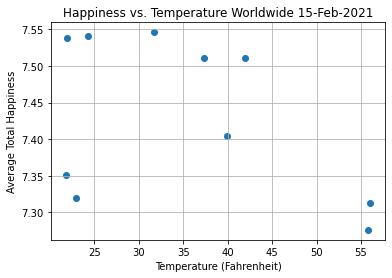

In [25]:
plt.scatter(cities_weather_df["Temp"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Temperature Worldwide 15-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Temperature (Fahrenheit)")
plt.grid(True)
plt.savefig("HapVStempWorld.png")

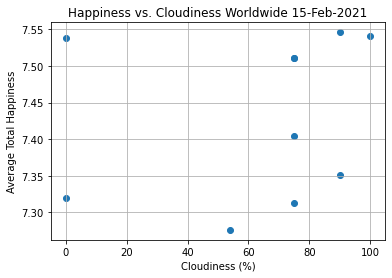

In [20]:
plt.scatter(cities_weather_df["Cloudiness"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Cloudiness Worldwide 15-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("CloudVStempWorld.png")

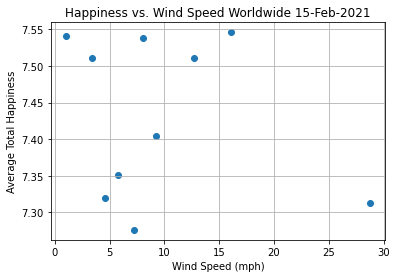

In [21]:
plt.scatter(cities_weather_df["Wind Speed"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Wind Speed Worldwide 15-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("WindVStempWorld.png")

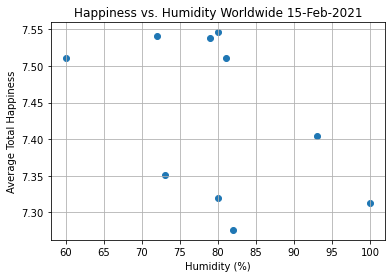

In [22]:
plt.scatter(cities_weather_df["Humidity"], cities_weather_df["Avg Happiness"], marker="o")
plt.title("Happiness vs. Humidity Worldwide 15-Feb-2021")
plt.ylabel("Average Total Happiness")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.savefig("HumidVStempWorld.png")

NameError: name 'gender_chart' is not defined

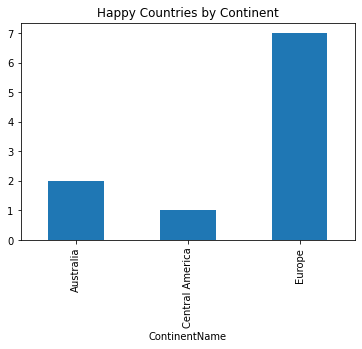

In [26]:
# Split up our data into groups based upon 'gender'
region_groups = cities_weather_df.groupby('ContinentName')

# Find out how many of each gender took bike trips
region_happies = region_groups['Temp'].count()

# Chart our data, give it a title, and label the axes
region_chart = region_happies.plot(kind="bar", title="Happy Countries by Continent")
region_chart.set_xlabel("Continent")
region_chart.set_ylabel("Number of Occurances")

plt.show()
plt.tight_layout()